In [2]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [5]:
data = {
    "Hours_Studied": np.random.randint(1, 10, 10),
    "Sleep_Hours": np.random.randint(4, 10, 10),
    "Classes_Attended": np.random.randint(10, 50, 10),
    "Previous_Score": np.random.randint(40, 100, 10),
}
df = pd.DataFrame(data)

In [6]:
df

,Hours_Studied,Sleep_Hours,Classes_Attended,Previous_Score
0,8,9,11,83
1,8,7,17,55
2,8,6,46,92
3,3,6,10,71
4,1,4,10,92
5,1,7,18,71
6,4,6,34,88
7,4,8,24,96
8,9,4,43,43
9,1,8,25,97


In [7]:
df.describe()

,Hours_Studied,Sleep_Hours,Classes_Attended,Previous_Score
count,10.000000,10.000000,10.000000,10.000000
mean,4.700000,6.500000,23.800000,78.800000
std,3.267687,1.649916,13.298287,18.401691
min,1.000000,4.000000,10.000000,43.000000
25%,1.500000,6.000000,12.500000,71.000000
50%,4.000000,6.500000,21.000000,85.500000
75%,8.000000,7.750000,31.750000,92.000000
max,9.000000,9.000000,46.000000,97.000000


In [8]:
df.shape

(10, 4)

In [9]:
si=StandardScaler()
si_trf= si.fit_transform(df)

In [10]:
pca= PCA(n_components=2)


In [11]:
pca_final= pca.fit_transform(si_trf)

In [12]:
pca.explained_variance_ratio_

array([0.46574224, 0.24820202])

In [13]:
pca_final

array([[-0.65313721,  1.78403767],
       [ 0.94456588,  0.63370774],
       [ 1.17721315,  0.65157224],
       [-0.47519826, -0.75892521],
       [-0.97949364, -2.02316635],
       [-0.78426961, -0.51896986],
       [ 0.10902269, -0.22103919],
       [-1.02792392,  0.76122537],
       [ 3.25599166, -0.54458541],
       [-1.56677073,  0.23614301]])

In [14]:
df.shape

(10, 4)

In [15]:
import matplotlib.pyplot as plt

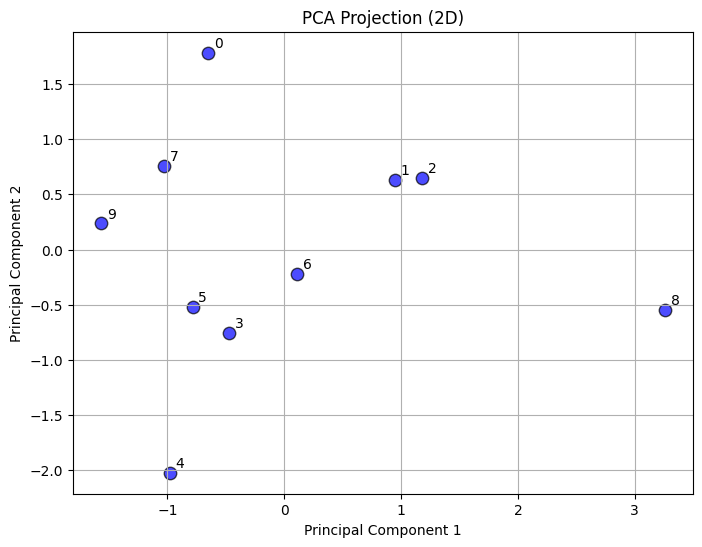

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(pca_final[:,0], pca_final[:,1], c='blue', s=80, alpha=0.7, edgecolors='k')

# Add labels
for i, txt in enumerate(df.index):
    plt.annotate(txt, (pca_final[i,0]+0.05, pca_final[i,1]+0.05))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (2D)")
plt.grid(True)
plt.show()

In [17]:
np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)
df = df.sample(40)


In [18]:
df.head(5)

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [19]:
df.shape

(40, 4)

In [21]:
si = StandardScaler()
si_trf = si.fit_transform(df)

In [22]:
pca = PCA(n_components=2)
pca_final = pca.fit_transform(si_trf)

In [23]:
pca_final

array([[ 2.4870398 ,  0.18940109],
       [-0.31097411, -0.77179795],
       [ 0.98963779,  0.45762994],
       [ 1.29490333,  1.66645724],
       [ 1.60802426, -1.99416024],
       [-1.15992909,  0.98173066],
       [-1.24212483,  0.85830195],
       [ 1.60922042,  0.7740681 ],
       [-0.47262271, -0.42261081],
       [-1.76914248,  0.50954076],
       [-0.54113186, -1.70943211],
       [ 1.86202793, -0.77879794],
       [ 1.41617454,  0.89004545],
       [ 0.83521704, -1.1149984 ],
       [-0.69819769,  0.35062265],
       [-2.4185864 ,  1.79276779],
       [ 1.71524807,  0.10682484],
       [ 0.82603726,  0.25238855],
       [ 1.08949915, -1.24394648],
       [-1.38787358,  0.51728243],
       [-0.9315134 , -0.30573743],
       [-1.4372757 , -0.64228633],
       [-1.411789  , -1.95040107],
       [ 1.69666626, -0.29816982],
       [-1.22771045, -1.19174787],
       [-2.75148303,  0.21055079],
       [-0.81971908,  0.12331245],
       [-1.98651207, -0.31170941],
       [ 1.13863006,

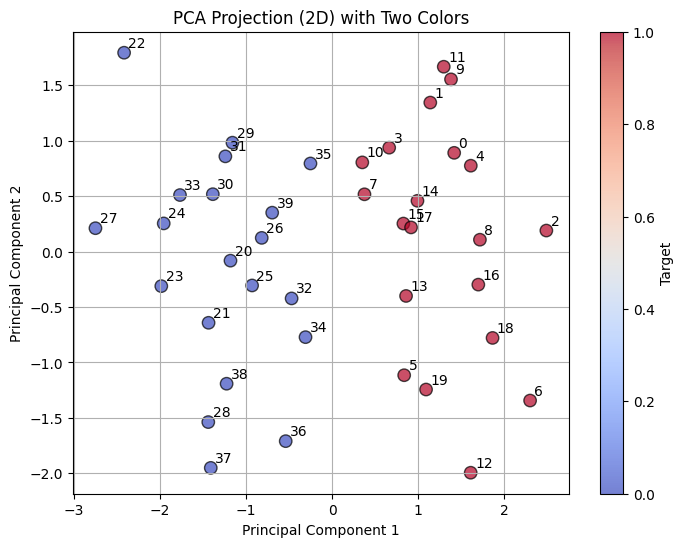

In [24]:


import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter plot with color based on target column (0/1)
plt.scatter(pca_final[:,0], pca_final[:,1],
            c=df['target'],          # color points by target
            cmap='coolwarm',         # colormap (blue-red)
            s=80, alpha=0.7, edgecolors='k')

# Add labels (row index)
for i, txt in enumerate(df.index):
    plt.annotate(txt, (pca_final[i,0]+0.05, pca_final[i,1]+0.05))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (2D) with Two Colors")
plt.colorbar(label='Target')  # shows which color corresponds to which target
plt.grid(True)
plt.show()


In [25]:
new_df = pd.DataFrame(pca_final,columns=['PC0','PC1'])

In [26]:
new_df.head()

,PC0,PC1
0,2.487040,0.189401
1,-0.310974,-0.771798
2,0.989638,0.457630
3,1.294903,1.666457
4,1.608024,-1.994160


In [27]:
new_df['target']=df['target'].values

In [28]:
new_df.head(7)

,PC0,PC1,target
0,2.487040,0.189401,1
1,-0.310974,-0.771798,0
2,0.989638,0.457630,1
3,1.294903,1.666457,1
4,1.608024,-1.994160,1
5,-1.159929,0.981731,0
6,-1.242125,0.858302,0


In [42]:
df

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1
29,1.425140,1.441152,0.182561,0
31,2.224431,0.230401,1.192120,0
4,0.322272,0.060343,-1.043450,1
32,-0.723253,1.461259,-0.085367,0
33,2.823378,-0.332863,2.637391,0


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])
     

# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)
     

# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

eigen_values
     
eigen_vectors

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [45]:
pc = eigen_vectors[0:2]

transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df1 = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df1['target'] = df['target'].values
new_df1.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


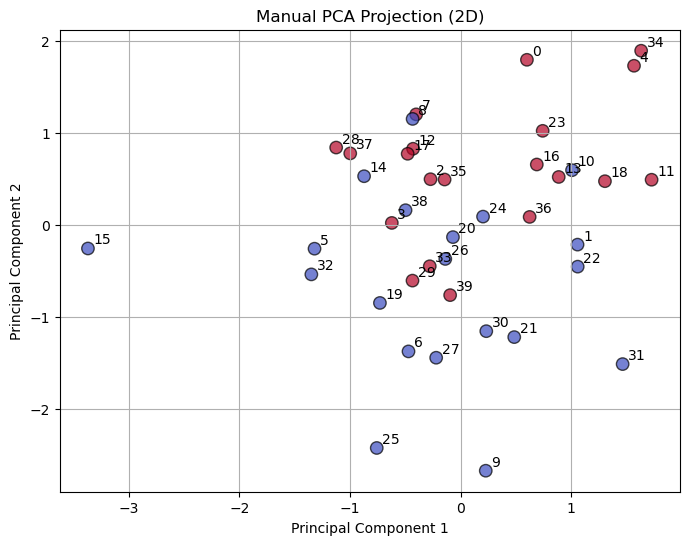

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Plot PC1 vs PC2
plt.scatter(new_df1['PC1'], new_df1['PC2'],
            c=new_df1['target'],   # color by target
            cmap='coolwarm',       # nice 2-color gradient
            s=80, alpha=0.7, edgecolors='k')

# Add labels (row index)
for i, txt in enumerate(new_df1.index):
    plt.annotate(txt, (new_df1['PC1'][i] + 0.05, new_df1['PC2'][i] + 0.05))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Manual PCA Projection (2D)")
plt.grid(True)
plt.show()


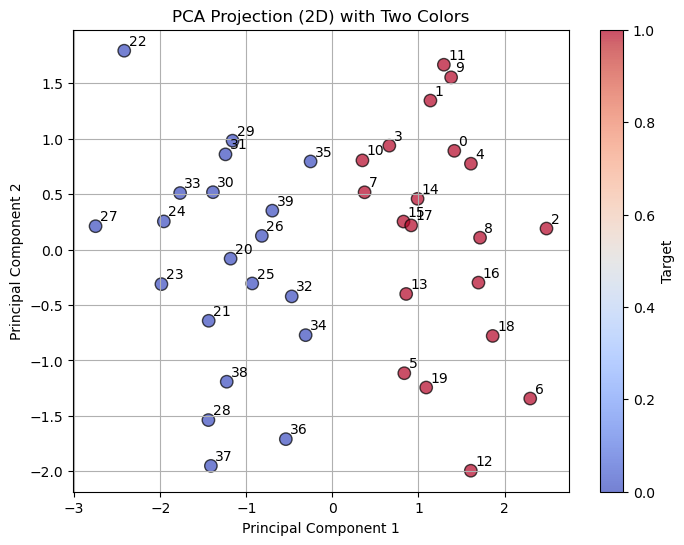

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter plot with color based on target column (0/1)
plt.scatter(pca_final[:,0], pca_final[:,1],
            c=df['target'],          # color points by target
            cmap='coolwarm',         # colormap (blue-red)
            s=80, alpha=0.7, edgecolors='k')

# Add labels (row index)
for i, txt in enumerate(df.index):
    plt.annotate(txt, (pca_final[i,0]+0.05, pca_final[i,1]+0.05))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (2D) with Two Colors")
plt.colorbar(label='Target')  # shows which color corresponds to which target
plt.grid(True)
plt.show()
